In [1]:
import copy

from neural_network import NNTrain
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p

In [2]:
def get_p(a):
    p = np.array([np.zeros((2, a.hidden_nodes)), 
                  np.zeros(a.hidden_nodes),
                  np.zeros(a.hidden_nodes)])
    p[0][0] = a.p00
    p[0][1] = a.p01
    p[1] = a.p1
    p[2] = a.p2
    
    return p

In [34]:
a = NNTrain(dx_r=0.3, dx_th=0.06, bx=0.01, hidden_nodes=10, alpha=1e-5, batch_size=500, bc=1)

In [35]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [44]:
bc_multiplier = 5
thresh = 1e-4

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-8  or a.bc > 1000:
        break
    if np.mean([np.abs(s-t) for s, t in zip(a.cost_rate[-21:], a.cost_rate[-20:])]) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

KeyboardInterrupt: 

In [42]:
a.bc *= bc_multiplier
a.alpha /= bc_multiplier

In [45]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('number of iterations', len(a.cost_rate))
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, dx_r=0.01, dx_th=0.005))

alpha: 2.0000000000000003e-06
BC: 5
number of iterations 192844
relative error: 0.34403552416613525


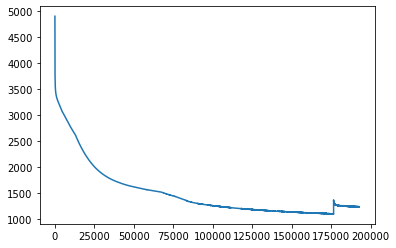

In [46]:
plot_iteration(a.cost_rate, min_it=10)

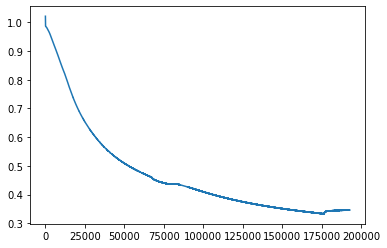

In [47]:
plot_iteration(a.rel_err, min_it=10)

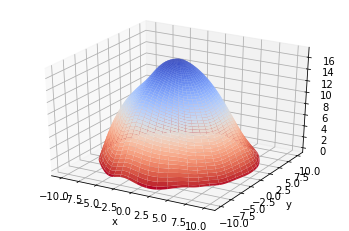

In [48]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)